# Import library

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Load dataset

In [2]:

file_path = '/content/drive/MyDrive/MachineLearningFinal/melb_data_cleaned.xlsx'
data = pd.read_excel(file_path)

# Data processing

In [3]:
# Select relevant columns for the model
selected_columns = [
    'Rooms', 'Type', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
    'BuildingArea', 'YearBuilt', 'Regionname', 'Propertycount', 'Method', 'Price'
]
data_filtered = data[selected_columns]

In [4]:
# Drop rows with missing values
data_filtered = data_filtered.dropna()

In [5]:
# Encode categorical columns
categorical_columns = ['Type', 'Regionname', 'Method']
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    data_filtered[col] = label_encoders[col].fit_transform(data_filtered[col])

# Split the data into features (X) and target (y)

In [6]:

X = data_filtered.drop(columns=['Price'])
y = data_filtered['Price']

# Split into training and test sets

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gradient Boosting model

In [8]:

gbr = GradientBoostingRegressor(random_state=42)

In [9]:
# Set up hyperparameter grid for optimization
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

In [10]:
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [11]:
# Retrieve the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set

In [12]:

y_pred = best_model.predict(X_test)

# Evaluate the model

In [13]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
best_params = grid_search.best_params_

In [14]:
# Print model evaluation metrics
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print(f"Best Parameters: {best_params}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 173824.74992283672
Root Mean Squared Error (RMSE): 283479.4966374148
R-squared (R2): 0.8045613747625656
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.8}


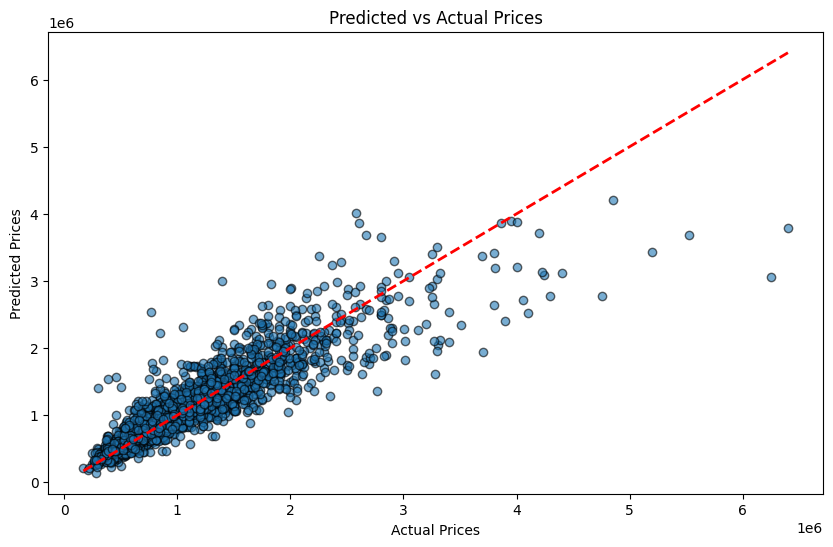

In [15]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")
plt.show()

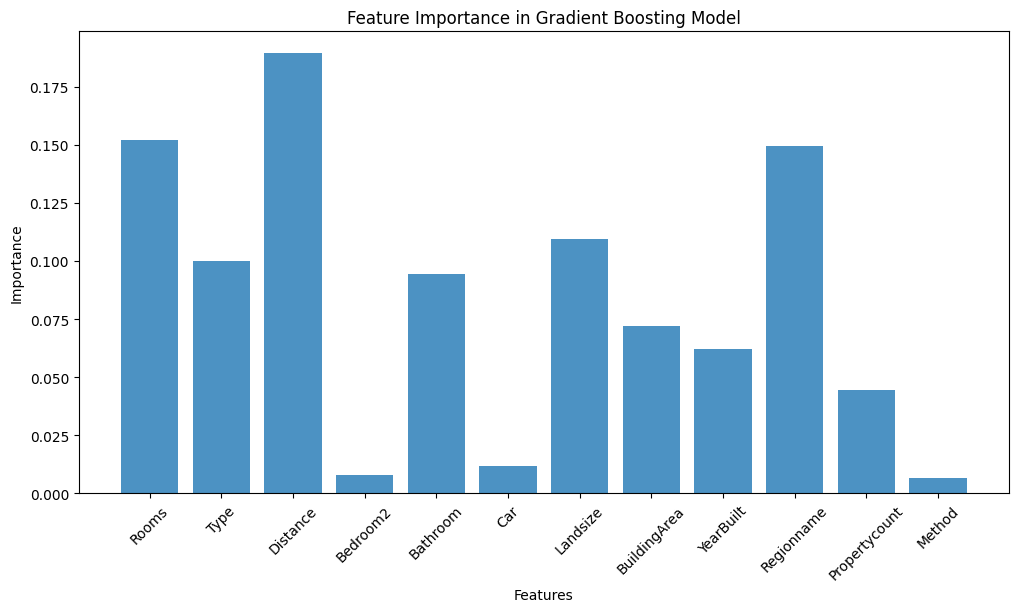

In [16]:

# Plot feature importance
feature_importance = best_model.feature_importances_
features = X.columns
plt.figure(figsize=(12, 6))
plt.bar(features, feature_importance, align='center', alpha=0.8)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Gradient Boosting Model")
plt.xticks(rotation=45)
plt.show()

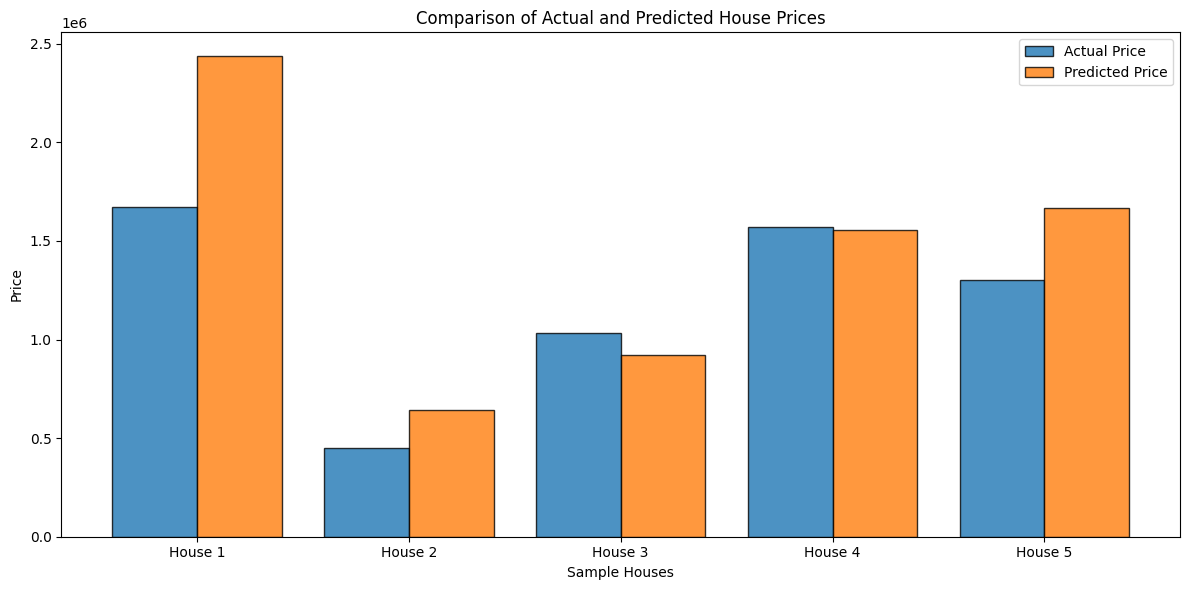

In [18]:
import matplotlib.pyplot as plt

# Extract actual and predicted prices
actual_prices = sample_data['Actual_Price']
predicted_prices = sample_data['Predicted_Price']

# Create a bar plot to compare actual and predicted prices
plt.figure(figsize=(12, 6))
x_labels = [f'House {i+1}' for i in range(len(actual_prices))]
x_positions = range(len(actual_prices))

plt.bar(x_positions, actual_prices, width=0.4, label='Actual Price', alpha=0.8, edgecolor='k')
plt.bar([p + 0.4 for p in x_positions], predicted_prices, width=0.4, label='Predicted Price', alpha=0.8, edgecolor='k')

plt.xticks([p + 0.2 for p in x_positions], x_labels)
plt.xlabel("Sample Houses")
plt.ylabel("Price")
plt.title("Comparison of Actual and Predicted House Prices")
plt.legend()
plt.tight_layout()
plt.show()




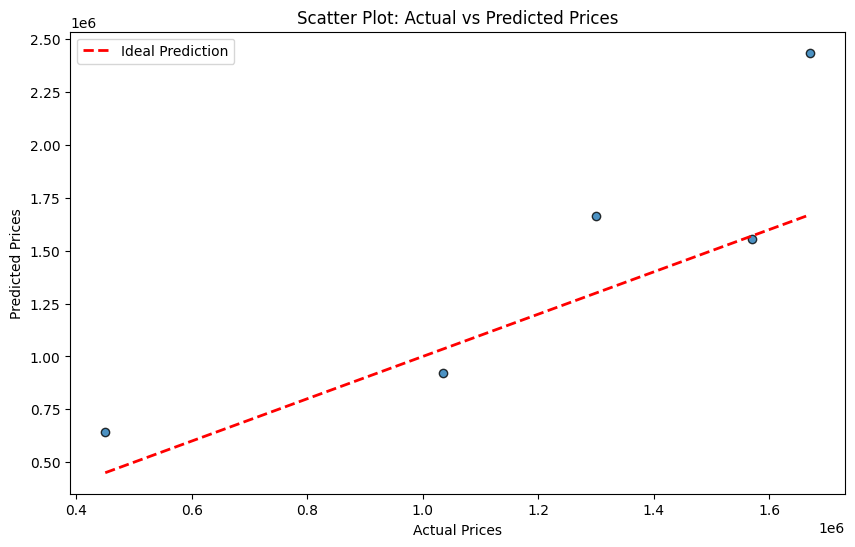

In [19]:
# Plot a scatter plot of Actual vs Predicted prices for better understanding
plt.figure(figsize=(10, 6))
plt.scatter(actual_prices, predicted_prices, alpha=0.8, edgecolor='k')
plt.plot([min(actual_prices), max(actual_prices)], [min(actual_prices), max(actual_prices)],
         color='red', linestyle='--', linewidth=2, label='Ideal Prediction')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Scatter Plot: Actual vs Predicted Prices")
plt.legend()
plt.show()

In [20]:
# Sample any 5 houses from the test data set
sample_data = X_test.sample(5, random_state=42)

# Get the actual price of the houses
sample_data['Actual_Price'] = y_test.loc[sample_data.index]

# Price predictions for model homes
predicted_prices = best_model.predict(sample_data.drop(columns=['Actual_Price']))

# Add predicted price to sample data
sample_data['Predicted_Price'] = predicted_prices

# Display detailed information of any 5 houses with both actual and predicted prices
print(sample_data[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
                   'Landsize', 'BuildingArea', 'YearBuilt',
                   'Propertycount', 'Actual_Price', 'Predicted_Price']])


      Rooms  Distance  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
993       4      13.1         4         4    4       707           162   
8832      2       5.3         2         1    1      2338          1482   
5324      2       2.6         2         1    0       108            72   
9079      3      10.1         3         2    2       602           180   
1491      4      11.8         4         2    2       744           300   

      YearBuilt  Propertycount  Actual_Price  Predicted_Price  
993        1926           4605       1670000     2.436265e+06  
8832       1965          11308        450000     6.423968e+05  
5324       1900          14949       1035000     9.214099e+05  
9079       1970           7822       1570000     1.553905e+06  
1491       1985           4480       1300000     1.665341e+06  
